In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MEMBACA DATASET

In [5]:
data = pd.read_csv("sales.csv")
data

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


# MEMILIH DATA DARI DATASET UNTUK DIGUNAKAN SEBAGAI ATRIBUT X

In [6]:
data = data[["W1", "W2"]] #W1=x1; W2=x2
data.head(10)

,W1,W2
0,12,10
1,6,3
2,11,8
3,8,13
4,5,13
5,3,2
6,8,3
7,6,10
8,9,10
9,19,19


# MELIHAT RINGKASAN STATISTIK

In [7]:
data.describe()

,W1,W2
count,811.000000,811.000000
mean,9.129470,9.389642
std,12.564766,13.045073
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,3.000000
75%,12.000000,12.000000
max,53.000000,56.000000


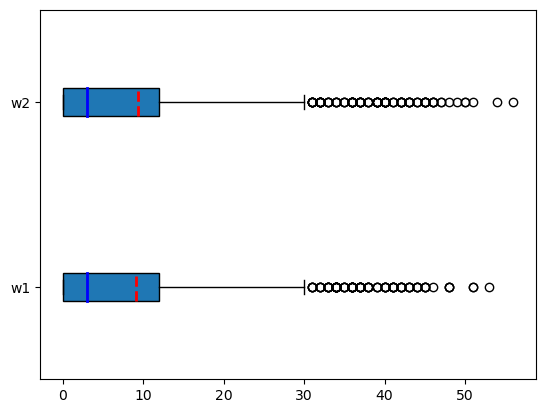

In [8]:
fig, ax = plt.subplots()
ax.boxplot(data,
          vert = False,
          showmeans = True,
          meanline = True,
          labels = ("w1", "w2"),
          patch_artist = True,
          medianprops = {"linewidth" : 2, "color" : "blue"},
          meanprops = {"linewidth" : 2, "color" : "red"})
plt.show()

# BUANG OUTLIER

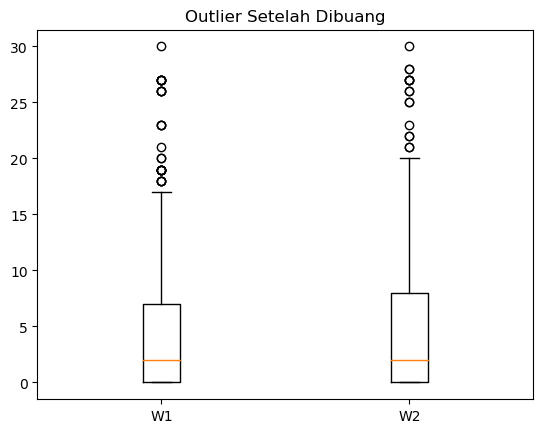

In [9]:
#Q1, Q3, dan IQR
kolom = ["W1", "W2"]

Q1 = data[kolom].quantile(0.25)
Q3 = data[kolom].quantile(0.75)
IQR = Q3-Q1
data = data[~((data[kolom]<(Q1 - 1.5 * IQR)) |
              (data[kolom]>(Q3 + 1.5 *IQR))).any(axis = 1)]

plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Outlier Setelah Dibuang")
plt.show()

In [10]:
data.describe()

,W1,W2
count,692.000000,692.000000
mean,4.562139,4.617052
std,5.920399,5.939824
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,2.000000
75%,7.000000,8.000000
max,30.000000,30.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 810
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W1      692 non-null    int64
 1   W2      692 non-null    int64
dtypes: int64(2)
memory usage: 16.2 KB


# MEMBUAT NILAI X

In [12]:
x_array = np.array(data)

# VISUALISASI PERSEBARAN DATA

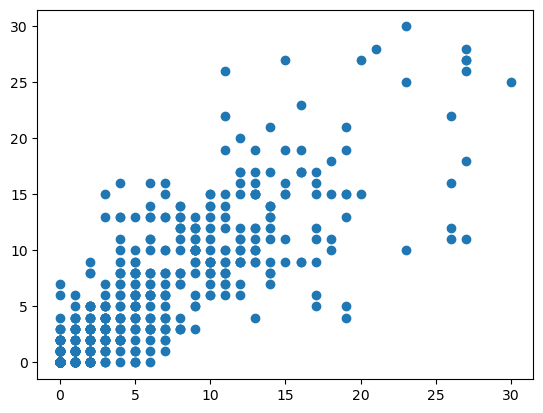

In [13]:
plt.scatter(data.W1, data.W2)
plt.show()

# STANDARISASI

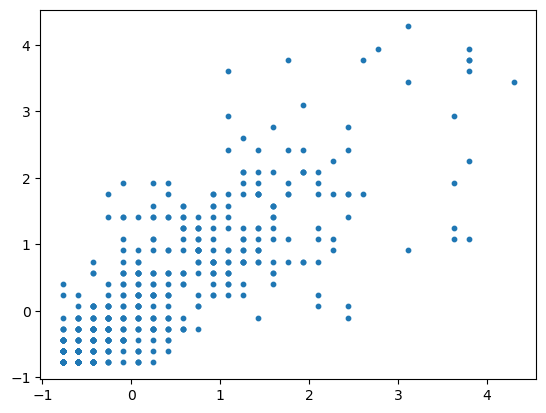

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
plt.show()

# CEK SUM OF SQUARE ERROR DARI TIAP PEMBAGIAN JUMLAH CLUSTER

In [15]:
from sklearn.cluster import KMeans
sse = []
index = range(1,10)
for i in index :
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init='auto')
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i,sse_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


1 1383.9999999999989


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


2 436.10809145136005


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


3 266.2695721394464


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


4 204.3275249480622


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


5 153.34694016020276


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


6 125.86607899774152


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


7 107.77754063536408


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


8 95.007314031773
9 90.22720442965468


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


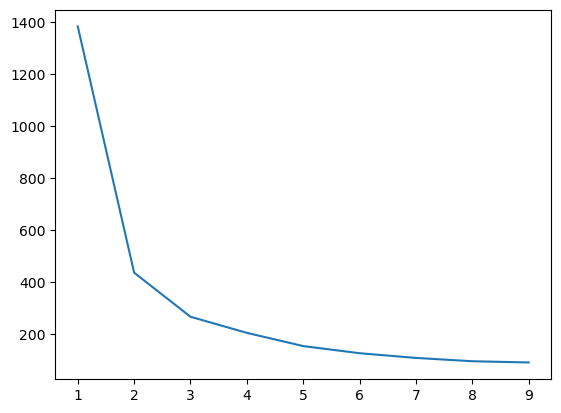

In [16]:
plt.plot(index, sse)
plt.show()

# MEMBUAT MODEL

In [17]:
kmeans = KMeans (n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(x_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=0)

# MELIHAT CLUSTER PUSAT

In [18]:
kmeans.cluster_centers_

array([[ 0.66561553,  0.70309988],
       [ 2.22042053,  2.21995313],
       [-0.59523924, -0.61091112]])

# VISUALISASI PERSEBARAN DATA SETELAH CLUSTERING

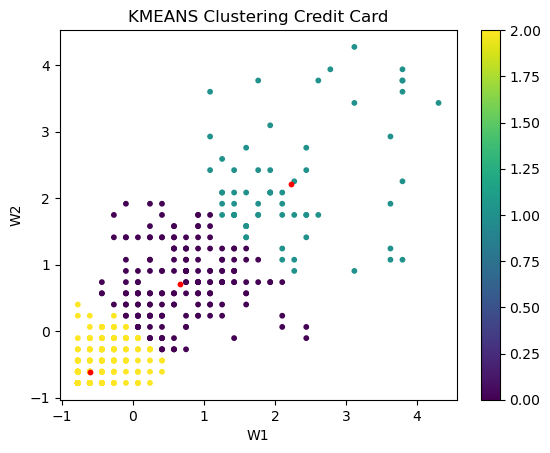

In [19]:
output = plt.scatter(x_scaled[:,0],x_scaled[:,1], s=10, c = kmeans.labels_) #DATANYA

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=10) #centroid
plt.title("KMEANS Clustering Credit Card")
plt.xlabel("W1")
plt.ylabel("W2")
plt.colorbar(output)
plt.show()

# EVALUASI MODEL

In [20]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.7319476108924287